# 3. Iris Flowers Classification :

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load your dataset (replace 'wine_data.csv' with your dataset's file path)
data = pd.read_csv('D:\\archive\\IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Extract features and target
X = data.iloc[:, :-1].values  # Features (sepal length, sepal width, petal length, petal width)
y = data.iloc[:, -1].values   # Target variable (species)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create a K-Nearest Neighbors (KNN) classifier
k = 3  # You can adjust this hyperparameter
knn = KNeighborsClassifier(n_neighbors=k)

In [8]:
# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [13]:
# Example usage to predict the species based on petal and sepal length
sample_data = [[5.1, 3.5, 1.4, 0.2]]  # Replace with your own data
predicted_species = knn.predict(sample_data)
print(f'Predicted species: {predicted_species[0]}')

Predicted species: Iris-setosa


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

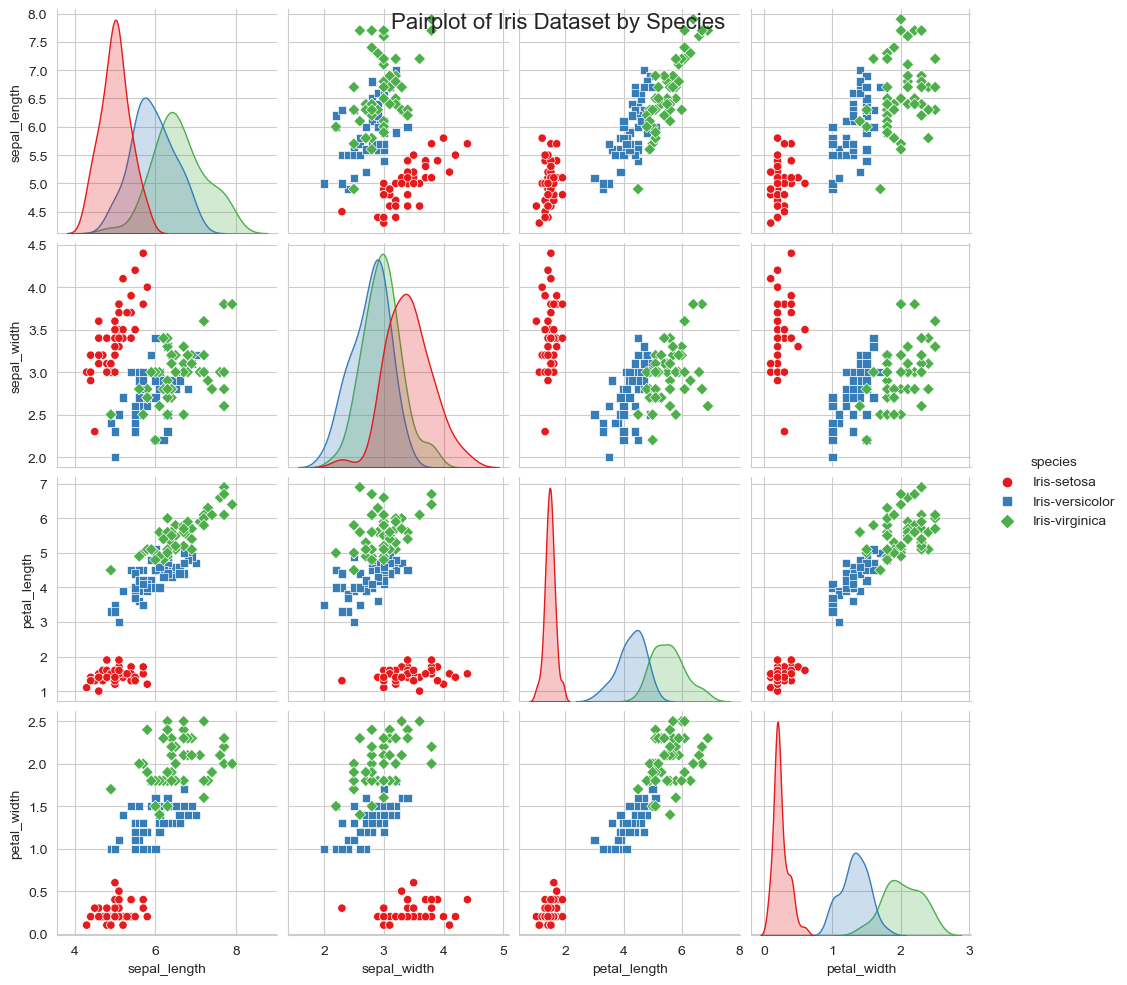

In [35]:
# Pairplot colored by target variable (species)
sns.set_style("whitegrid")
sns.pairplot(data, hue="species", markers=["o", "s", "D"], palette="Set1")
plt.suptitle("Pairplot of Iris Dataset by Species", size=16)
plt.show()

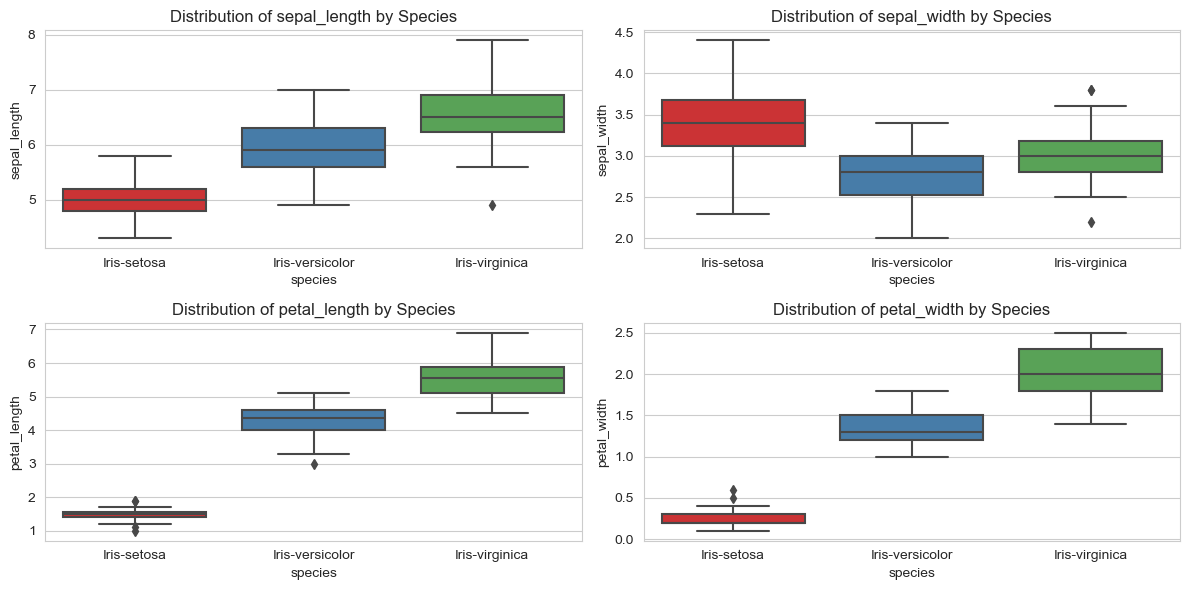

In [36]:
# Box plots to visualize feature distributions by species
plt.figure(figsize=(12, 6))
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="species", y=feature, data=data, palette="Set1")
    plt.title(f"Distribution of {feature} by Species")
plt.tight_layout()
plt.show()

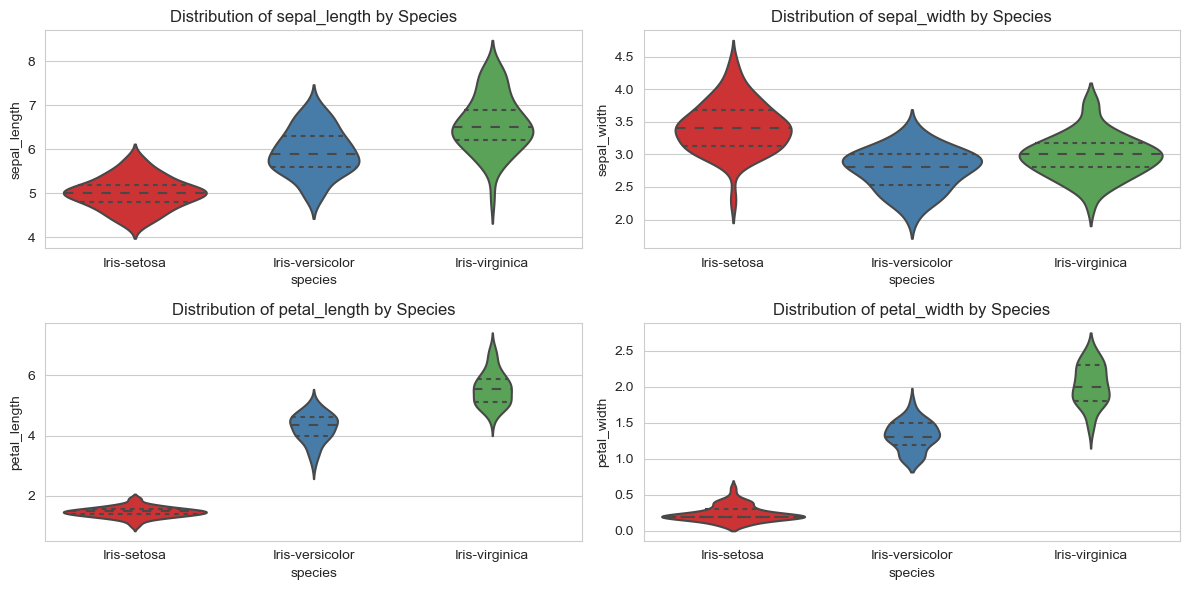

In [37]:
# Violin plots to visualize feature distributions by species
plt.figure(figsize=(12, 6))
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x="species", y=feature, data=data, palette="Set1", inner="quart")
    plt.title(f"Distribution of {feature} by Species")
plt.tight_layout()
plt.show()

In [39]:
# Classification report for KNN classifier
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
classification_rep = classification_report(y_test, y_pred, target_names=le.classes_)

print("Classification Report:")
print(classification_rep)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
